**Import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.applications import VGG19



**Load and split data**

In [ ]:
!cp /content/drive/MyDrive/ASL.zip /content/

In [ ]:
!unzip ASL.zip -d /content/ASL_dataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (46).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (460).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (461).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (462).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (463).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (464).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (465).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (466).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (467).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (468).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (469).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (47).JPG  
 extracting: /content/ASL_d

In [ ]:
train_path = '/content/ASL_dataset/ASL'

In [ ]:
arabic_alphabet = ['ع', 'ال', 'أ', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']

In [ ]:
data = pd.read_csv('/content/ASL_dataset/ASL/Labels/ImagesClassPath.csv')
data.head(-5)

,id,ClassId,ImagePath
0,1,0,ArASL_Database_54K/ain/AIN (1).JPG
1,2,0,ArASL_Database_54K/ain/AIN (10).JPG
2,3,0,ArASL_Database_54K/ain/AIN (100).jpg
3,4,0,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,0,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,31,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,31,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,31,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,31,ArASL_Database_54K/zay/ZAY (993).jpg


In [ ]:
for i in range(data.shape[0]):
    data.loc[i, 'ClassId'] = arabic_alphabet[data.loc[i, 'ClassId']]
data.head(-5)

,id,ClassId,ImagePath
0,1,ع,ArASL_Database_54K/ain/AIN (1).JPG
1,2,ع,ArASL_Database_54K/ain/AIN (10).JPG
2,3,ع,ArASL_Database_54K/ain/AIN (100).jpg
3,4,ع,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,ع,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,ز,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,ز,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,ز,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,ز,ArASL_Database_54K/zay/ZAY (993).jpg


In [ ]:
df = pd.DataFrame({'img':data['ImagePath'],
                   'class':data['ClassId']})
df.head(-5)

,img,class
0,ArASL_Database_54K/ain/AIN (1).JPG,ع
1,ArASL_Database_54K/ain/AIN (10).JPG,ع
2,ArASL_Database_54K/ain/AIN (100).jpg,ع
3,ArASL_Database_54K/ain/AIN (1000).JPG,ع
4,ArASL_Database_54K/ain/AIN (1001).JPG,ع
...,...,...
54039,ArASL_Database_54K/zay/ZAY (990).jpg,ز
54040,ArASL_Database_54K/zay/ZAY (991).jpg,ز
54041,ArASL_Database_54K/zay/ZAY (992).jpg,ز
54042,ArASL_Database_54K/zay/ZAY (993).jpg,ز


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)

df_train, df_val = train_test_split(df_train, test_size=0.1, shuffle=True)
print('Train shape:', df_train.shape)
print('Validation shape:', df_val.shape)
print('Test shape:', df_test.shape)



Train shape: (38915, 2)
Validation shape: (4324, 2)
Test shape: (10810, 2)


In [ ]:
size=64
batch = 128
epochs = 17
steps_per_epoch=  data.shape[0] // batch


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=False)

datagenScale = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = datagen.flow_from_dataframe(
    df_train,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size = (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = batch)

val_datagen = datagenScale.flow_from_dataframe(
    df_val,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size= (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = batch)

test_datagen = datagenScale.flow_from_dataframe(
    df_test,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size= (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = 1)


Found 38915 validated image filenames belonging to 32 classes.
Found 4324 validated image filenames belonging to 32 classes.
Found 10810 validated image filenames belonging to 32 classes.


In [ ]:
train_datagen.class_indices


{'أ': 0,
 'ئ': 1,
 'ال': 2,
 'ب': 3,
 'ة': 4,
 'ت': 5,
 'ث': 6,
 'ج': 7,
 'ح': 8,
 'خ': 9,
 'د': 10,
 'ذ': 11,
 'ر': 12,
 'ز': 13,
 'س': 14,
 'ش': 15,
 'ص': 16,
 'ض': 17,
 'ط': 18,
 'ظ': 19,
 'ع': 20,
 'غ': 21,
 'ف': 22,
 'ق': 23,
 'ك': 24,
 'ل': 25,
 'لا': 26,
 'م': 27,
 'ن': 28,
 'ه': 29,
 'و': 30,
 'ي': 31}

**VGG16 model**

In [ ]:
vgg16Model = VGG16(weights='imagenet',include_top = False, input_shape=(size, size, 3))
for layer in vgg16Model.layers[:-8]:
    layer.trainable = False

for layer in vgg16Model.layers:
    print(layer, layer.trainable)
vgg16Model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f06ca729d50> False
<keras.layers.convolutional.Conv2D object at 0x7f06c9e64d10> False
<keras.layers.convolutional.Conv2D object at 0x7f06c92c4850> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c8a0c050> False
<keras.layers.convolutional.Conv2D object at 0x7f06c0074b50> False
<keras.layers.convolutional.Conv2D object at 0x7f06c0007190> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c000f410> False
<keras.layers.convolutional.Conv2D object at 0x7f06c000a110> False
<keras.layers.convolutional.Conv2D object at 0x7f06c0057390> False
<keras.layers.convolutional.Conv2D object at 0x7f06c00193d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c001f610> False
<keras.layers.convolutional.Conv2D object at 0x7f06c0057d90> True
<keras.layers.convolutional.Conv2D object at 0x7f06c0025890> True
<keras.layers.convolutional.Conv2D object at 0x7f06c0030110> True
<keras.layers.pooling.MaxPooling2D object at 0x7f06c001dc90> Tr

In [ ]:
model = Sequential()
model.add(vgg16Model)

model.add(GlobalAveragePooling2D())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Dense(32))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
print(val_datagen.class_indices)

{'أ': 0, 'ئ': 1, 'ال': 2, 'ب': 3, 'ة': 4, 'ت': 5, 'ث': 6, 'ج': 7, 'ح': 8, 'خ': 9, 'د': 10, 'ذ': 11, 'ر': 12, 'ز': 13, 'س': 14, 'ش': 15, 'ص': 16, 'ض': 17, 'ط': 18, 'ظ': 19, 'ع': 20, 'غ': 21, 'ف': 22, 'ق': 23, 'ك': 24, 'ل': 25, 'لا': 26, 'م': 27, 'ن': 28, 'ه': 29, 'و': 30, 'ي': 31}


In [ ]:
history = model.fit(train_datagen,
          validation_data = val_datagen,
          epochs= epochs,
          verbose=1,
          shuffle=True,
          )

Epoch 1/17
305/305 [==============================] - 102s 281ms/step - loss: 2.5346 - accuracy: 0.2535 - val_loss: 3.5490 - val_accuracy: 0.2116
Epoch 2/17
305/305 [==============================] - 73s 240ms/step - loss: 0.9739 - accuracy: 0.6792 - val_loss: 0.6594 - val_accuracy: 0.7618
Epoch 3/17
305/305 [==============================] - 75s 244ms/step - loss: 0.4935 - accuracy: 0.8498 - val_loss: 0.3160 - val_accuracy: 0.9096
Epoch 4/17
305/305 [==============================] - 76s 249ms/step - loss: 0.3200 - accuracy: 0.9058 - val_loss: 0.1978 - val_accuracy: 0.9359
Epoch 5/17
305/305 [==============================] - 73s 239ms/step - loss: 0.2459 - accuracy: 0.9299 - val_loss: 0.1453 - val_accuracy: 0.9565
Epoch 6/17
305/305 [==============================] - 74s 242ms/step - loss: 0.1961 - accuracy: 0.9434 - val_loss: 0.1346 - val_accuracy: 0.9574
Epoch 7/17
305/305 [==============================] - 73s 239ms/step - loss: 0.1702 - accuracy: 0.9517 - val_loss: 0.2192 - val_a

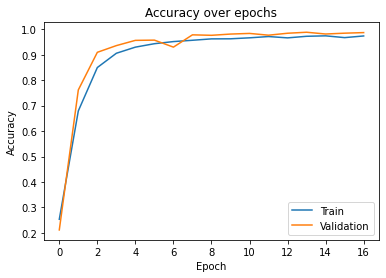

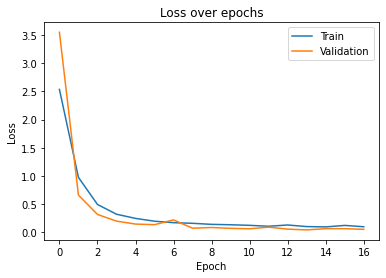

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# test the model
test_loss, test_accuracy = model.evaluate(test_datagen)
print(f'Loss: {test_loss}, accuracy: {test_accuracy}')

85/85 [==============================] - 22s 125ms/step - loss: 0.0389 - accuracy: 0.9882
Loss: 0.038908544927835464, accuracy: 0.9881591200828552


In [ ]:
# save the model
model.save('modelVGG16.hdf5')